In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [26]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = pd.read_csv(path, header=None)
print(df.shape)
df.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


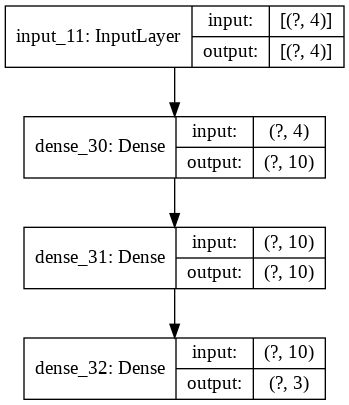

In [51]:
# define model

inputs = keras.Input(shape=(X_train.shape[1]))
x = Dense(10, activation='relu', kernel_initializer='he_normal')(inputs)
x = Dense(10, activation='relu', kernel_initializer='he_normal')(x)
outputs = Dense(3, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='iris_simple_model')

keras.utils.plot_model(model, show_shapes=True)

In [52]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=0)
# evaluate the model
model.evaluate(X_test, y_test, verbose=0)

[0.17145401239395142, 0.9399999976158142]

In [54]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, np.argmax(yhat)))

Predicted: [[9.9433690e-01 5.5905851e-03 7.2488845e-05]] (class=0)
